# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot. The data can be found in the `data` folder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale = 1.2)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [3]:
data.select_dtypes(object)

,Supplier,ItemCode,Description,ItemType
0,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE
1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE
2,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR
3,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR
4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE
...,...,...,...,...
128350,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER
128351,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER
128352,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS
128353,NaN,BC,BEER CREDIT,REF


In [4]:
data.select_dtypes(np.number)

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,0.00,1.0,0.0
1,2017,4,0.00,1.0,0.0
2,2017,4,0.00,8.0,0.0
3,2017,4,0.00,2.0,0.0
4,2017,4,0.00,4.0,0.0
...,...,...,...,...,...
128350,2018,2,66.46,59.0,212.0
128351,2018,2,9.08,7.0,35.0
128352,2018,2,0.00,0.0,32.0
128353,2018,2,0.00,0.0,-35.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [55]:
# Converting the relevant data in the right format for plotting; stacking the Retail Sales, Retail Transfers, and Warehouse Sales into 1 column
data1 = data.pivot_table(index=['ItemType'], values=['RetailSales', 'RetailTransfers', 'WarehouseSales'], aggfunc='sum')
data1 = data1.stack()
data1 = data1.reset_index()

# Renaming the columns in dataset data1
data1.columns = ['ItemType', 'SalesType', 'Total']

In [98]:
data1.head()

,ItemType,SalesType,Total
0,BEER,RetailSales,209763.11
1,BEER,RetailTransfers,234924.44
2,BEER,WarehouseSales,2437617.32
3,DUNNAGE,RetailSales,0.00
4,DUNNAGE,RetailTransfers,0.00


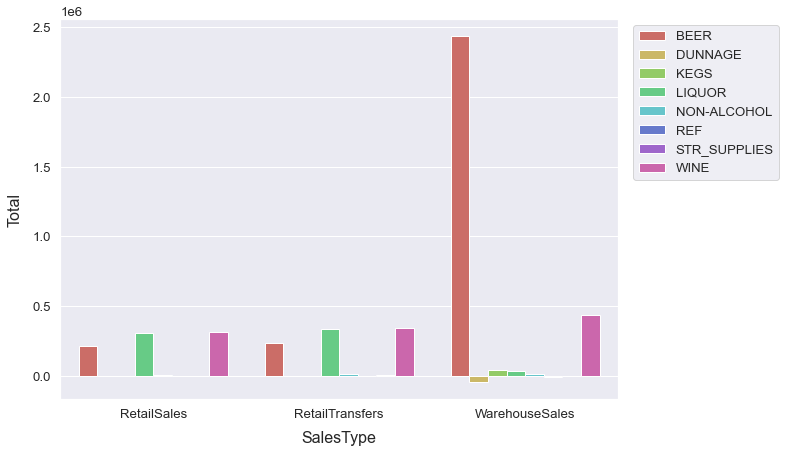

In [97]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1 = sns.barplot(x='SalesType', y='Total', hue='ItemType', data=data1, palette='hls')

ax1.set_xlabel(ax1.get_xlabel(), fontsize=16, labelpad=10)
ax1.set_ylabel(ax1.get_ylabel(), fontsize=16, labelpad=10)
ax1.legend(loc='best', bbox_to_anchor=(1.3, 1))
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [122]:
# creating dataset
data2 = data[['Supplier', 'RetailSales', 'RetailTransfers', 'WarehouseSales']]

# calculating the total sale for each row, via creating a new column 'TotalSales'
data2['TotalSales'] = data2[['RetailSales', 'RetailTransfers', 'WarehouseSales']].apply(np.sum, axis=1)
data2.head()

<ipython-input-122-05a48ef54fd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['TotalSales'] = data2[['RetailSales', 'RetailTransfers', 'WarehouseSales']].apply(np.sum, axis=1)


,Supplier,RetailSales,RetailTransfers,WarehouseSales,TotalSales
0,ROYAL WINE CORP,0.0,1.0,0.0,1.0
1,SANTA MARGHERITA USA INC,0.0,1.0,0.0,1.0
2,JIM BEAM BRANDS CO,0.0,8.0,0.0,8.0
3,HEAVEN HILL DISTILLERIES INC,0.0,2.0,0.0,2.0
4,ROYAL WINE CORP,0.0,4.0,0.0,4.0


In [128]:
# Finding the top 10 suppliers with the most total sale

# creating a subset containing only Supplier and TotalSales
subset = data2[['Supplier', 'TotalSales']]

# aggregate on column Supplier using np.sum
subset = subset.pivot_table(index='Supplier', aggfunc=np.sum)

# sorting the subset in descending order
sorted_subset = subset.sort_values(by='TotalSales', ascending=False)

# picking out top 10 suppliers and assigning them to a list
lst = list(sorted_subset.index[:11])

['MILLER BREWING COMPANY',
 'CROWN IMPORTS',
 'ANHEUSER BUSCH INC',
 'HEINEKEN USA',
 'E & J GALLO WINERY',
 'DIAGEO NORTH AMERICA INC',
 'CONSTELLATION BRANDS',
 'JIM BEAM BRANDS CO',
 'THE WINE GROUP',
 'BOSTON BEER CORPORATION',
 'YUENGLING BREWERY']

In [132]:
# filtering the 'data2' on the top 10 suppliers and re-assigning it to itself
cond = data2['Supplier'].isin(lst)
data2 = data2[cond]

# drop column 'TotalSales'
data2.drop(labels='TotalSales', axis=1, inplace=True)

# set column 'Supplier' as index
data2.set_index('Supplier', drop=True, inplace=True)

# stack the columns in one column 'SaleType' and reset index to have column 'Supplier' now as a normal column in the dataframe
refined_data2 = data2.stack().reset_index().rename(columns={0: 'Value', 'level_1': 'SaleType'})

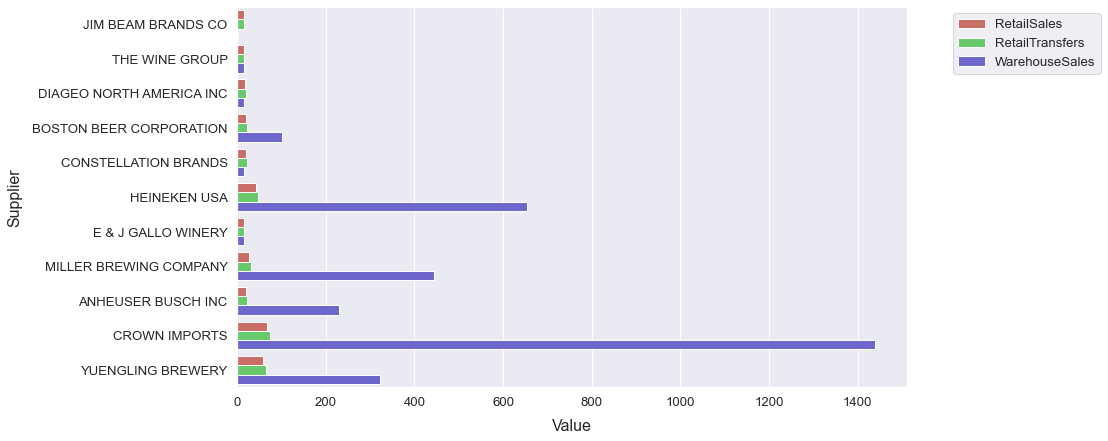

In [151]:
# plotting
fig, ax1 = plt.subplots(figsize=(12, 7))
ax1 = sns.barplot(y='Supplier', x='Value', hue='SaleType', data=refined_data2, palette='hls', orient='h', ci=None)

ax1.set_xlabel(ax1.get_xlabel(), fontsize=16, labelpad=10)
ax1.set_ylabel(ax1.get_ylabel(), fontsize=16, labelpad=10)
ax1.legend(loc='best', bbox_to_anchor=(1.3, 1))
plt.show()

## 3. Create a bar-chart chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [155]:
# get the numeric part of the initial dataset
data3 = data.select_dtypes(np.number)
data3.head()

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,0.0,1.0,0.0
1,2017,4,0.0,1.0,0.0
2,2017,4,0.0,8.0,0.0
3,2017,4,0.0,2.0,0.0
4,2017,4,0.0,4.0,0.0


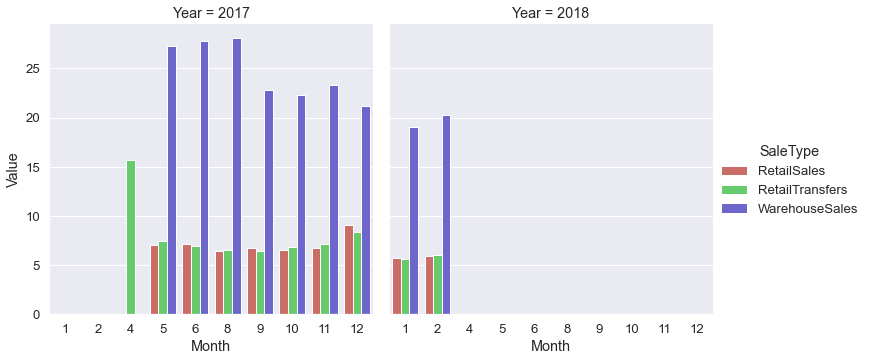

In [179]:
# OPTION 1:
pivotted_data3 = data3.pivot_table(index=['Year', 'Month'], values=['RetailSales', 'RetailTransfers', 'WarehouseSales'], aggfunc='mean')
data3_final = pivotted_data3.stack().reset_index().rename(columns={0: 'Value', 'level_2': 'SaleType'})

ax1 = sns.catplot(x='Month', y='Value', hue='SaleType', col='Year', data=data3_final, kind='bar', palette='hls', ci=None)

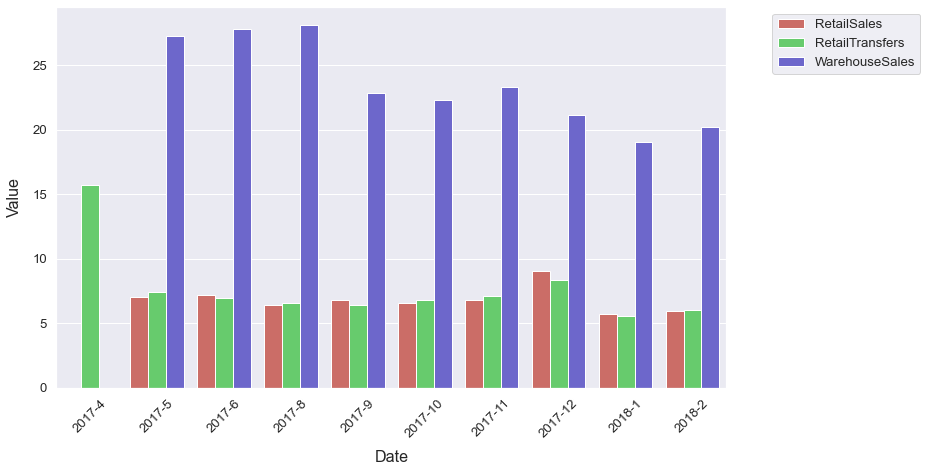

In [184]:
# OPTION 2:
extract = data3_final[['Year', 'Month']]
data3_final['Date'] = extract.apply(lambda row: str(row['Year'])+'-'+str(row['Month']), axis=1)

# plotting
fig, ax1 = plt.subplots(figsize=(12, 7))
ax1 = sns.barplot(x='Date', y='Value', hue='SaleType', data=data3_final, palette='hls', ci=None)

ax1.set_xlabel(ax1.get_xlabel(), fontsize=16, labelpad=10)
ax1.set_ylabel(ax1.get_ylabel(), fontsize=16, labelpad=10)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.legend(loc='best', bbox_to_anchor=(1.3, 1))
plt.show()

## 4. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [5]:
data4 = data[['Year', 'Month', 'RetailSales', 'ItemType']]
pivotted = data4.pivot_table(index=['Year', 'Month', 'ItemType'], values='RetailSales', aggfunc='sum')

In [6]:
pivotted.reset_index(inplace=True)

In [7]:
extract = pivotted[['Year', 'Month']]
pivotted['Date'] = extract.apply(lambda row: str(row['Year'])+'-'+str(row['Month']), axis=1)
pivotted

,Year,Month,ItemType,RetailSales,Date
0,2017,4,BEER,0.00,2017-4
1,2017,4,LIQUOR,0.00,2017-4
2,2017,4,NON-ALCOHOL,0.00,2017-4
3,2017,4,REF,0.00,2017-4
4,2017,4,STR_SUPPLIES,0.00,2017-4
...,...,...,...,...,...
68,2018,2,LIQUOR,28852.31,2018-2
69,2018,2,NON-ALCOHOL,812.84,2018-2
70,2018,2,REF,41.52,2018-2
71,2018,2,STR_SUPPLIES,47.76,2018-2


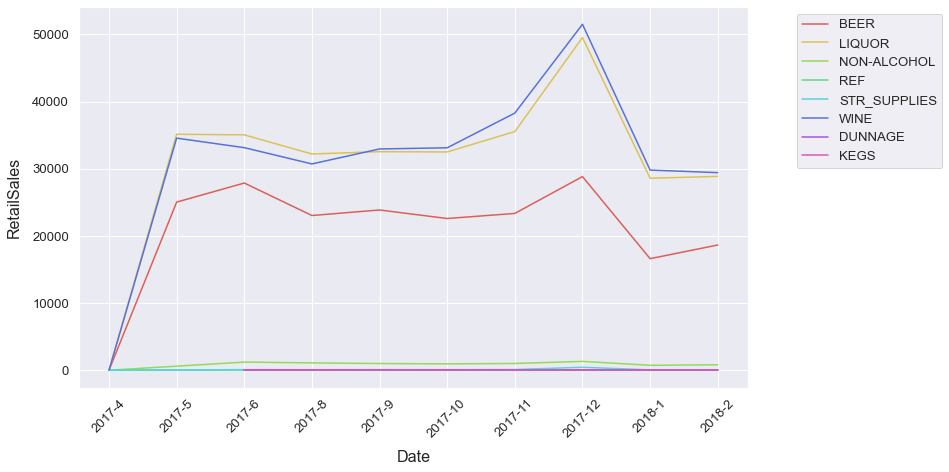

In [8]:
# plotting
fig, ax2 = plt.subplots(figsize=(12, 7))
ax2 = sns.lineplot(x='Date', y='RetailSales', hue='ItemType', data=pivotted, palette='hls')

ax2.set_xlabel(ax2.get_xlabel(), fontsize=16, labelpad=10)
ax2.set_ylabel(ax2.get_ylabel(), fontsize=16, labelpad=10)
ax2.set_xticklabels(list(pivotted['Date'].unique()), rotation=45)
ax2.legend(loc='best', bbox_to_anchor=(1.3, 1))
plt.show()

## 5. Plot the same information as above (i.e. Q5) but as a bar chart.

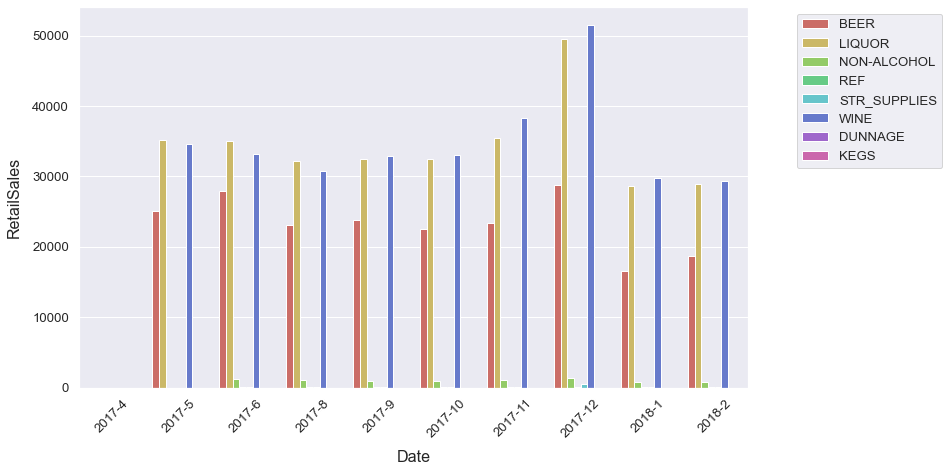

In [9]:
fig, ax2 = plt.subplots(figsize=(12, 7))
ax2 = sns.barplot(x='Date', y='RetailSales', hue='ItemType', data=pivotted, palette='hls')

ax2.set_xlabel(ax2.get_xlabel(), fontsize=16, labelpad=10)
ax2.set_ylabel(ax2.get_ylabel(), fontsize=16, labelpad=10)
ax2.set_xticklabels(list(pivotted['Date'].unique()), rotation=45)
ax2.legend(loc='best', bbox_to_anchor=(1.3, 1))
plt.show()

## 6. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

In [10]:
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [11]:
data5 = data[['RetailSales', 'RetailTransfers', 'ItemType']]

In [14]:
data5.head()

,RetailSales,RetailTransfers,ItemType
0,0.0,1.0,WINE
1,0.0,1.0,WINE
2,0.0,8.0,LIQUOR
3,0.0,2.0,LIQUOR
4,0.0,4.0,WINE


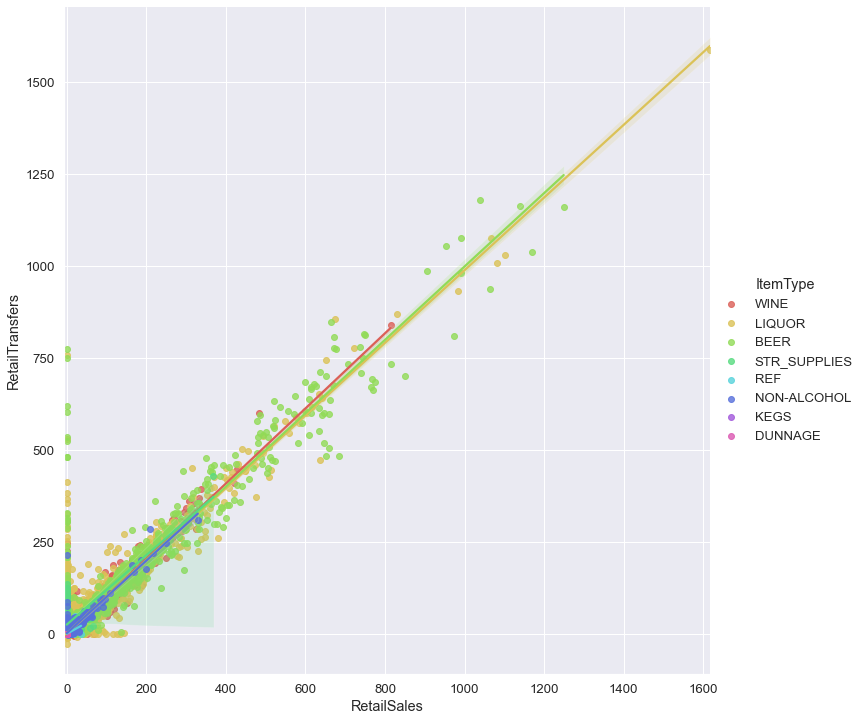

In [19]:
ax3 = sns.lmplot(x='RetailSales', y='RetailTransfers', hue='ItemType', data=data5, palette='hls', height=10, aspect=1)
plt.show()

## 7. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [20]:
data6 = data.select_dtypes(np.number)
data6.head()

,Year,Month,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,0.0,1.0,0.0
1,2017,4,0.0,1.0,0.0
2,2017,4,0.0,8.0,0.0
3,2017,4,0.0,2.0,0.0
4,2017,4,0.0,4.0,0.0


In [ ]:
ax4 = sns.pairplot(data=data6, palette='hls')
plt.show()